In [46]:
# !pip install pytesseract
# !pip install fuzzywuzzy

Imports and other variables

In [55]:
import os
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
import re

from tqdm.notebook import tqdm

C:\Users\fhacesga\Anaconda3\envs\deeplearning\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Parse the existing EXIF data
exif_data = image.info.get("exif", {})

# Convert the EXIF data to a dictionary
exif_dict = {TAGS[key]: exif_data[key] for key in exif_data.keys() if key in TAGS and exif_data[key] is not None}

# Add or update the custom EXIF tag for the date
exif_dict["CustomDateTag"] = "2023-06-25"  # Replace with the desired date

# Convert the dictionary back to EXIF format
exif_bytes = b""
for key, value in exif_dict.items():
    tag_id = TAGS.get(key, key)
    data = value if isinstance(value, bytes) else str(value).encode("utf-8")
    exif_bytes += tag_id + b"\x00" + data + b"\x00"

# Update the EXIF data in the image
image.info["exif"] = exif_bytes

# Save the modified image with the updated EXIF data
image.save(f"output/{image_file}")  # Save to the desired output folder

Add tesseract to path

In [2]:
t_path = r'C:\Users\fhacesga\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = t_path

In [3]:
base_dir = r"C:\Users\fhacesga\Desktop\FIRMsDigitizing\RECTDNN\data\000_WorkingFiles\\"

known_dir = f"{base_dir}Known"
unknown_dir = f"{base_dir}Unknown"
computed_dir = f"{base_dir}Computed"
encoded_dir  = f"{base_dir}Encoded"

In [41]:
# Set the path to the folder containing the images
folder_path = encoded_dir

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg", ".tif"))]

print(len(image_files))

# Initialize an empty dictionary to store the results
ocr_results = {}
img_results = {}

# Loop through each image file
for image_file in tqdm(image_files[:50]):
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Open the image using PIL
    with Image.open(image_path) as image:
        
        x1 = int(image.size[1] - image.size[1] * 1 / 4)
        y1 = int(image.size[0] - image.size[0] * 1 / 4)
        x2 = image.size[1]
        y2 = image.size[0]
        
        section_box = (y1, x1, y2, x2)
        
        image = image.crop(section_box)
        
        # plt.imshow(image)
        # plt.show()
        # Perform OCR using pytesseract
        text = pytesseract.image_to_string(image, lang='eng', config='--psm 11')

        # Store the extracted text in the dictionary
        ocr_results[image_file] = text
        img_results[image_file] = image

236


  0%|          | 0/50 [00:00<?, ?it/s]

In [82]:
def get_line_after_search_string(multiline_string, search_string, search_string1):
    # Split the multiline string into lines
    lines = multiline_string.splitlines()
    
    # Remove blank lines
    lines = [line.strip().lower() for line in lines if line.strip()]

    # Iterate through the lines
    for i, line in enumerate(lines):
        # Strip any leading or trailing whitespace
        line = line.strip()

        # Check if the line contains the search string
        if search_string in line or search_string1 in line:
            # Retrieve the next line after the search string if it exists
            if i + 1 < len(lines):
                next_line = lines[i + 1].strip()
                return next_line
    return None


def extract_date(text):
    # Define the regular expression pattern for matching the date format
    #pattern = r"(?i)(?:January|February|March|April|May|June|July|August|September|October|November|December|ber|ary)\s+\d{1,2},\s+\d{4}"
    pattern = r"(?i)(?:[A-Z]{0,10})(?:January|February|March|April|May|June|July|August|September|October|November|December|ary|ber)\s+\d{1,2},\s+\d{4}"

    #pattern = r"(?i)(?:[A-Z]{0,4})(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}"
    # pattern = r"(?i)(?:[A-Z]{0,2})[A-Z]?[A-Z]?[a-z]*\s+(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}"

    # Find all occurrences of the date format in the text
    matches = re.findall(pattern, text, re.I)
    print(matches)
    
    # Calculate the fuzzy match score for each match
    scores = [fuzz.ratio(match.lower(), pattern.lower()) for match in matches]
    
    if len(scores) == 0:
        return None

    # Find the index of the best fuzzy match
    best_match_index = scores.index(max(scores))

    # Extract the best matched date if found, or return None
    if best_match_index >= 0:
        date = matches[best_match_index]
        return date
    else:
        return None


In [49]:
#ocr_results

Image: 48039C0010I_t.tif
['SEPTEMBER 22, 1999']
SEPTEMBER 22, 1999
Image: 48039C0020H_t.tif
['JUNE 5, 1989']
JUNE 5, 1989
Image: 48039C0030I_t.tif
['SEPTEMBER 22, 1999']
SEPTEMBER 22, 1999
Image: 48039C0035I_t.tif
['SEPTEMBER 22, 1999']
SEPTEMBER 22, 1999
Image: 48039C0040I_t.tif
['SEPTEMBER 22, 1999']
SEPTEMBER 22, 1999
Image: 48039C0065J_t.tif
['SEPTEMBER 22, 1999']
SEPTEMBER 22, 1999
Image: 48039C0105H_t.tif
['JUNE 5, 1989']
JUNE 5, 1989
Image: 48039C0110H_t.tif
['JUNE 5, 1989']
JUNE 5, 1989
Image: 48157C0105J_t.tif
['JANUARY 3, 1997']
JANUARY 3, 1997
Image: 48157C0120J_t.tif
['JANUARY 3, 1997']
JANUARY 3, 1997
Image: 48157C0140K_t.tif
['APRIL 20, 2000']
APRIL 20, 2000
Image: 48157C0290J_t.tif
['JANUARY 3, 1997']
JANUARY 3, 1997
Image: 48201C0015H_t.tif
['EPTEMBER 30, 1992']
EPTEMBER 30, 1992
Image: 48201C0015J_t.tif
['NOVEMBER 6, 1996']
NOVEMBER 6, 1996
Image: 48201C0020G_t.tif
['SEPTEMBER 28, 1990']
SEPTEMBER 28, 1990
Image: 48201C0020J_t.tif
['NOVEMBER 6, 1996']
NOVEMBER 6, 1996


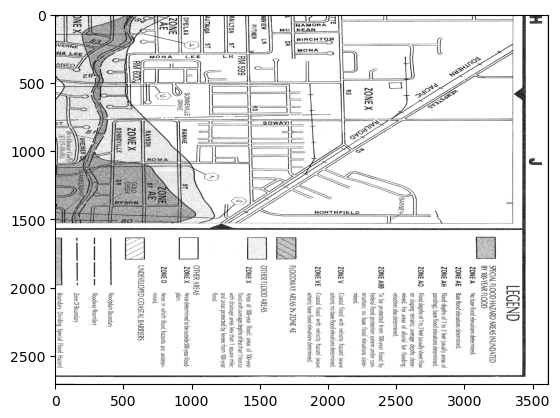

Image: 48201C0230J_t.tif
[]


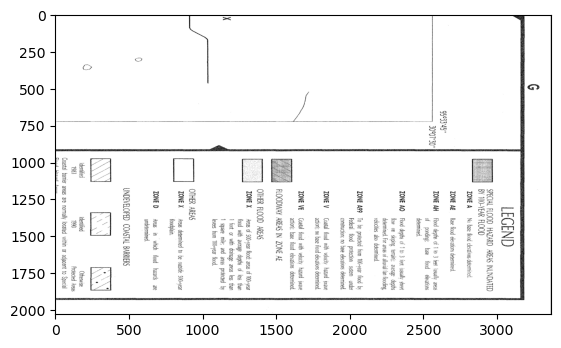

In [83]:
# Print the OCR results
for image_file, text in ocr_results.items():
    print(f"Image: {image_file}")
    date = extract_date(text)
    if date is not None:
        print(date)
        # print(text)
    else:
        plt.imshow(img_results[image_file])
        plt.show()